# How to return state before hitting recursion limit
> https://langchain-ai.github.io/langgraph/how-tos/return-when-recursion-limit-hits/

## Recursion Error

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph import START, END


class State(TypedDict):
    value: str
    action_result: str


def router(state: State):
    if state["value"] == "end":
        return END
    else:
        return "action"


def decision_node(state):
    return {"value": "keep going!"}


def action_node(state: State):
    # Do your action here ...
    return {"action_result": "what a great result!"}


workflow = StateGraph(State)
workflow.add_node("decision", decision_node)
workflow.add_node("action", action_node)
workflow.add_edge(START, "decision")
workflow.add_conditional_edges("decision", router, ["action", END])
workflow.add_edge("action", "decision")
app = workflow.compile()

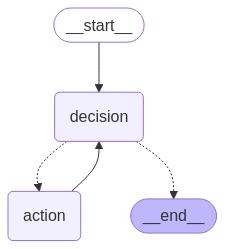

In [2]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [3]:
from langgraph.errors import GraphRecursionError

try:
    app.invoke({"value": "hi!"})
except GraphRecursionError:
    print("Recursion Error")

Recursion Error


## Return state before recursion limit

In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from typing import Annotated

from langgraph.managed.is_last_step import RemainingSteps


class State(TypedDict):
    value: str
    action_result: str
    remaining_steps: RemainingSteps


def router(state: State):
    # Force the agent to end
    if state["remaining_steps"] <= 2:
        return END
    if state["value"] == "end":
        return END
    else:
        return "action"


def decision_node(state):
    return {"value": "keep going!"}


def action_node(state: State):
    # Do your action here ...
    return {"action_result": "what a great result!"}


workflow = StateGraph(State)
workflow.add_node("decision", decision_node)
workflow.add_node("action", action_node)
workflow.add_edge(START, "decision")
workflow.add_conditional_edges("decision", router, ["action", END])
workflow.add_edge("action", "decision")
app = workflow.compile()

In [5]:
app.invoke({"value": "hi!"})

{'value': 'keep going!', 'action_result': 'what a great result!'}